**HEALTH INSURANCE COST PREDICTION**

*Health insurance costs vary based on multiple factors like age, BMI, smoking habits, and number of children. This project aims to build a machine learning model to predict insurance charges based on these factors. By using feature engineering and advanced ML techniques, we improve the accuracy of predictions, helping insurance companies and policyholders estimate costs effectively.*

*In this project, we analyze health insurance charges using Exploratory Data Analysis (EDA) and build Machine Learning models to predict insurance costs. By identifying key cost-driving factors, we aim to provide actionable insights that can help optimize insurance pricing and improve accessibility.*

*This project serves as a valuable tool for insurance companies, policymakers, and individuals to understand the cost implications of health-related factors and make data-driven decisions.*

**OBJECTIVE**

*Develop a machine learning model that not only predicts health insurance costs with high accuracy but also provides personalized cost-saving recommendations by analyzing lifestyle factors, medical history, and regional healthcare trends.By leveraging feature importance analysis and behavioral risk assessment, this project aims to bridge the gap between insurance providers and policyholders, promoting fair pricing and preventive healthcare strategies.*

**Methodology**

1️⃣ Data Preprocessing
Handling missing values 

Encoding categorical variables 

Feature scaling using StandardScaler

2️⃣ Exploratory Data Analysis (EDA)
Distribution of insurance charges using histograms

Correlation analysis to find relationships between features

Box plots to identify outliers

3️⃣ Model Selection
Linear Regression

Random Forest Regressor

4️⃣ Hyperparameter Tuning
GridSearchCV for hyperparameter optimization

Cross-validation for better generalization

**Importing Libraries**

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Loading and Observing the Data**

In [53]:
df=pd.read_csv('Health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Features:**

**1**: age – Age of the policyholder

**2**: sex – Gender (male / female)

**3**: bmi – Body Mass Index

**4**: children – Number of dependents

**5**: smoker – Whether the person is a smoker (yes/no)

**6**: region – Geographical region

**7**: charges – Insurance cost (Target Variable)

In [55]:
df.shape

(1338, 7)

**Data Preprocessing**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [58]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [59]:
df.drop_duplicates(inplace=True)

**Exploratory Data Analysis**

In [60]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


**Visualisation of Data**

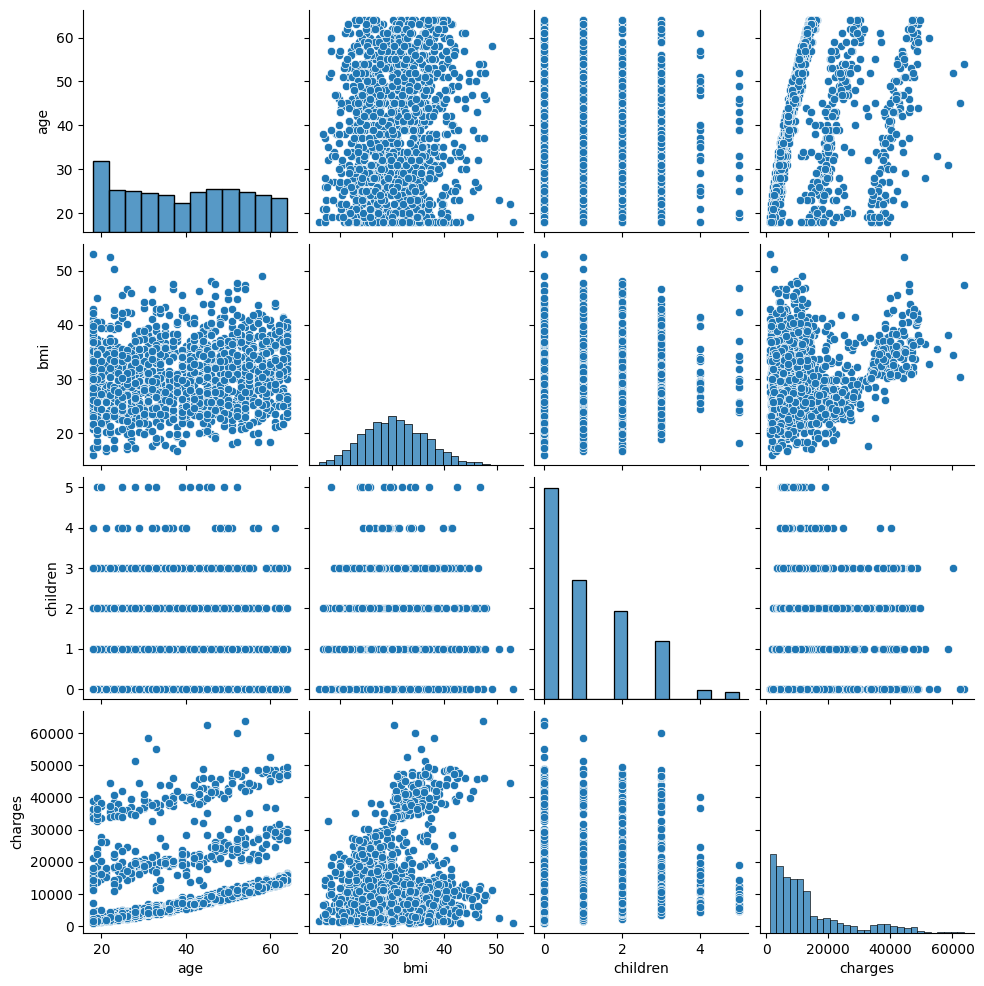

In [62]:
sns.pairplot(df)

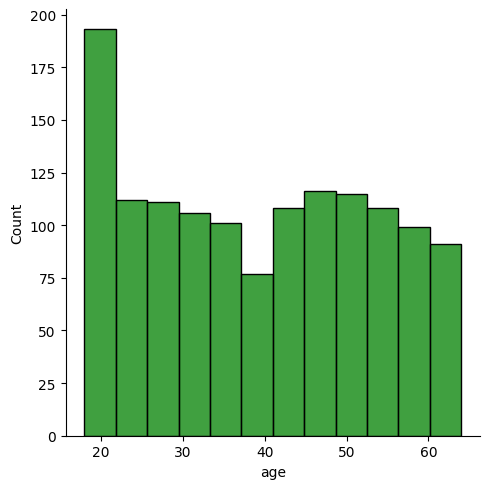

In [63]:
sns.displot(df['age'],kde=False,color='g')

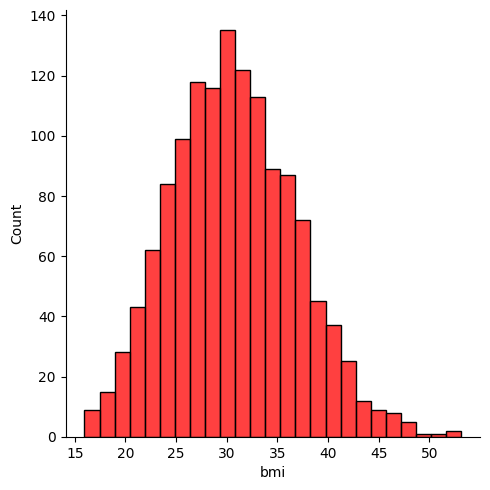

In [64]:
sns.displot(df['bmi'],kde=False,color='r')

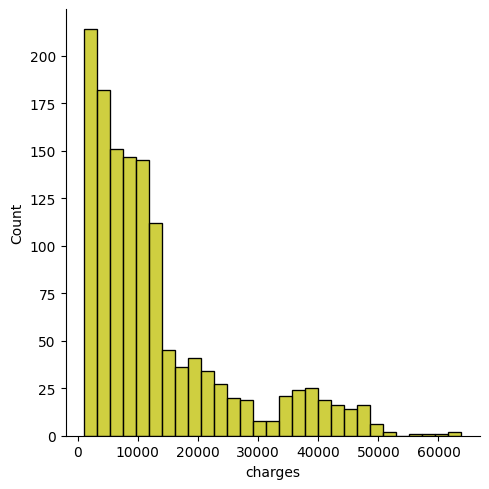

In [65]:
sns.displot(df['charges'],kde=False,color='y')

**Now let's do some data visualisation for the categorical features.**

<Axes: xlabel='sex', ylabel='count'>

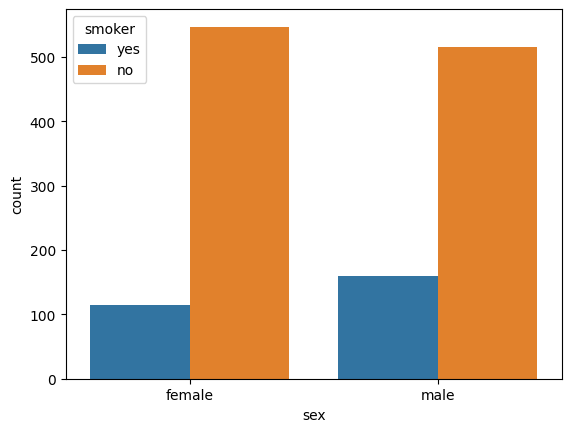

In [66]:
sns.countplot(x='sex',data=df,hue='smoker')

<Axes: xlabel='children', ylabel='count'>

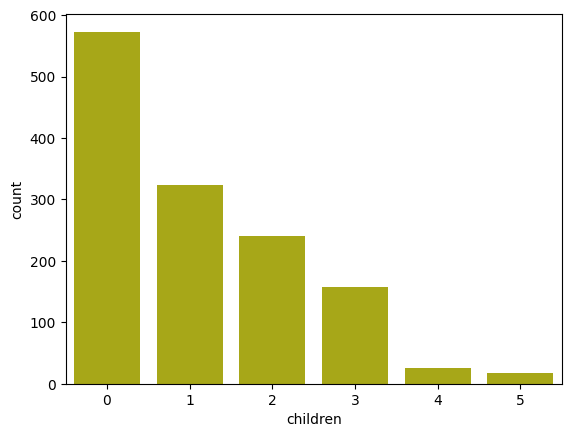

In [67]:
sns.countplot(x='children',data=df,color='y')

<Axes: xlabel='smoker', ylabel='count'>

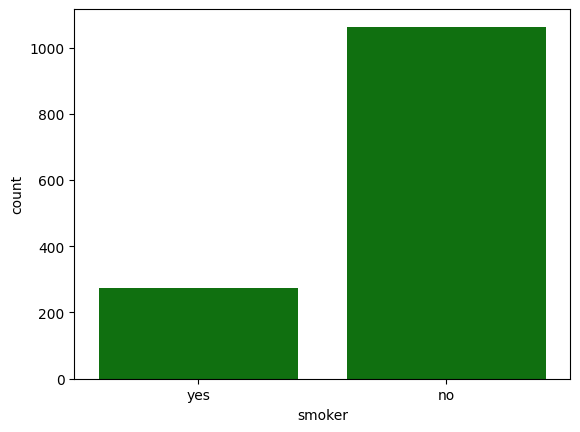

In [68]:
sns.countplot(x='smoker',data=df,color='g')

<Axes: xlabel='region', ylabel='count'>

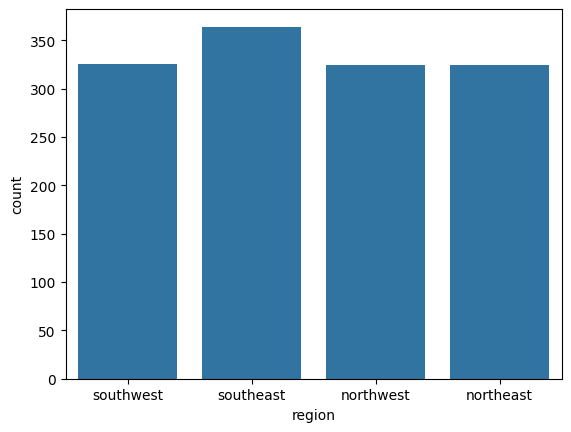

In [69]:
sns.countplot(x='region',data=df)

<Axes: xlabel='age', ylabel='charges'>

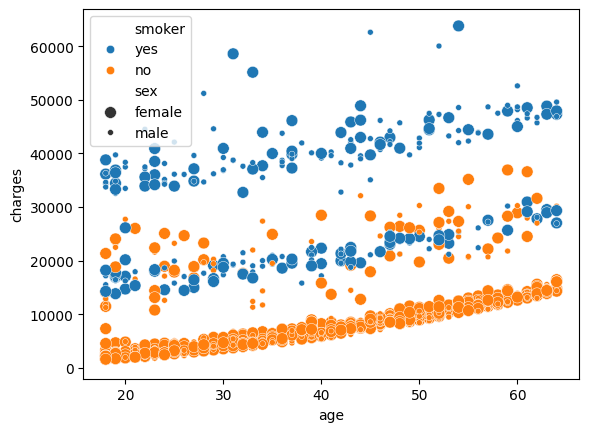

In [70]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker',size='sex')

<Axes: xlabel='age', ylabel='bmi'>

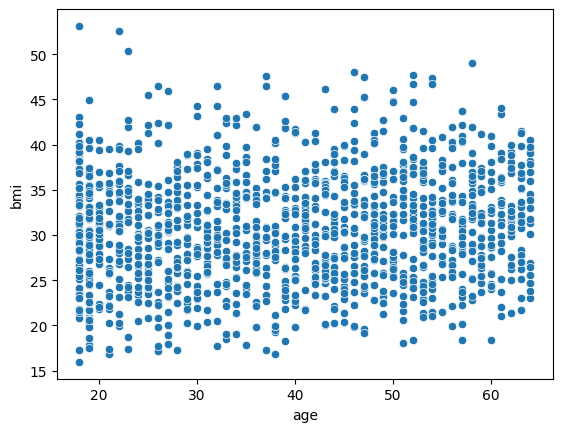

In [71]:
sns.scatterplot(data=df,x='age',y='bmi')

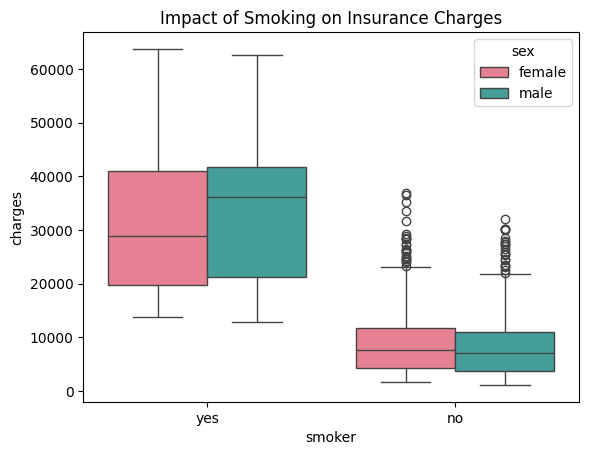

In [72]:
sns.boxplot(x='smoker', y='charges', data=df,hue='sex', palette='husl')
plt.title('Impact of Smoking on Insurance Charges')
plt.show()

In [73]:
bins = [17,35,50,200]
slots = ['Young adults', 'Senior adults', 'Elder']

df['age_range'] = pd.cut(df['age'], bins = bins, labels = slots)

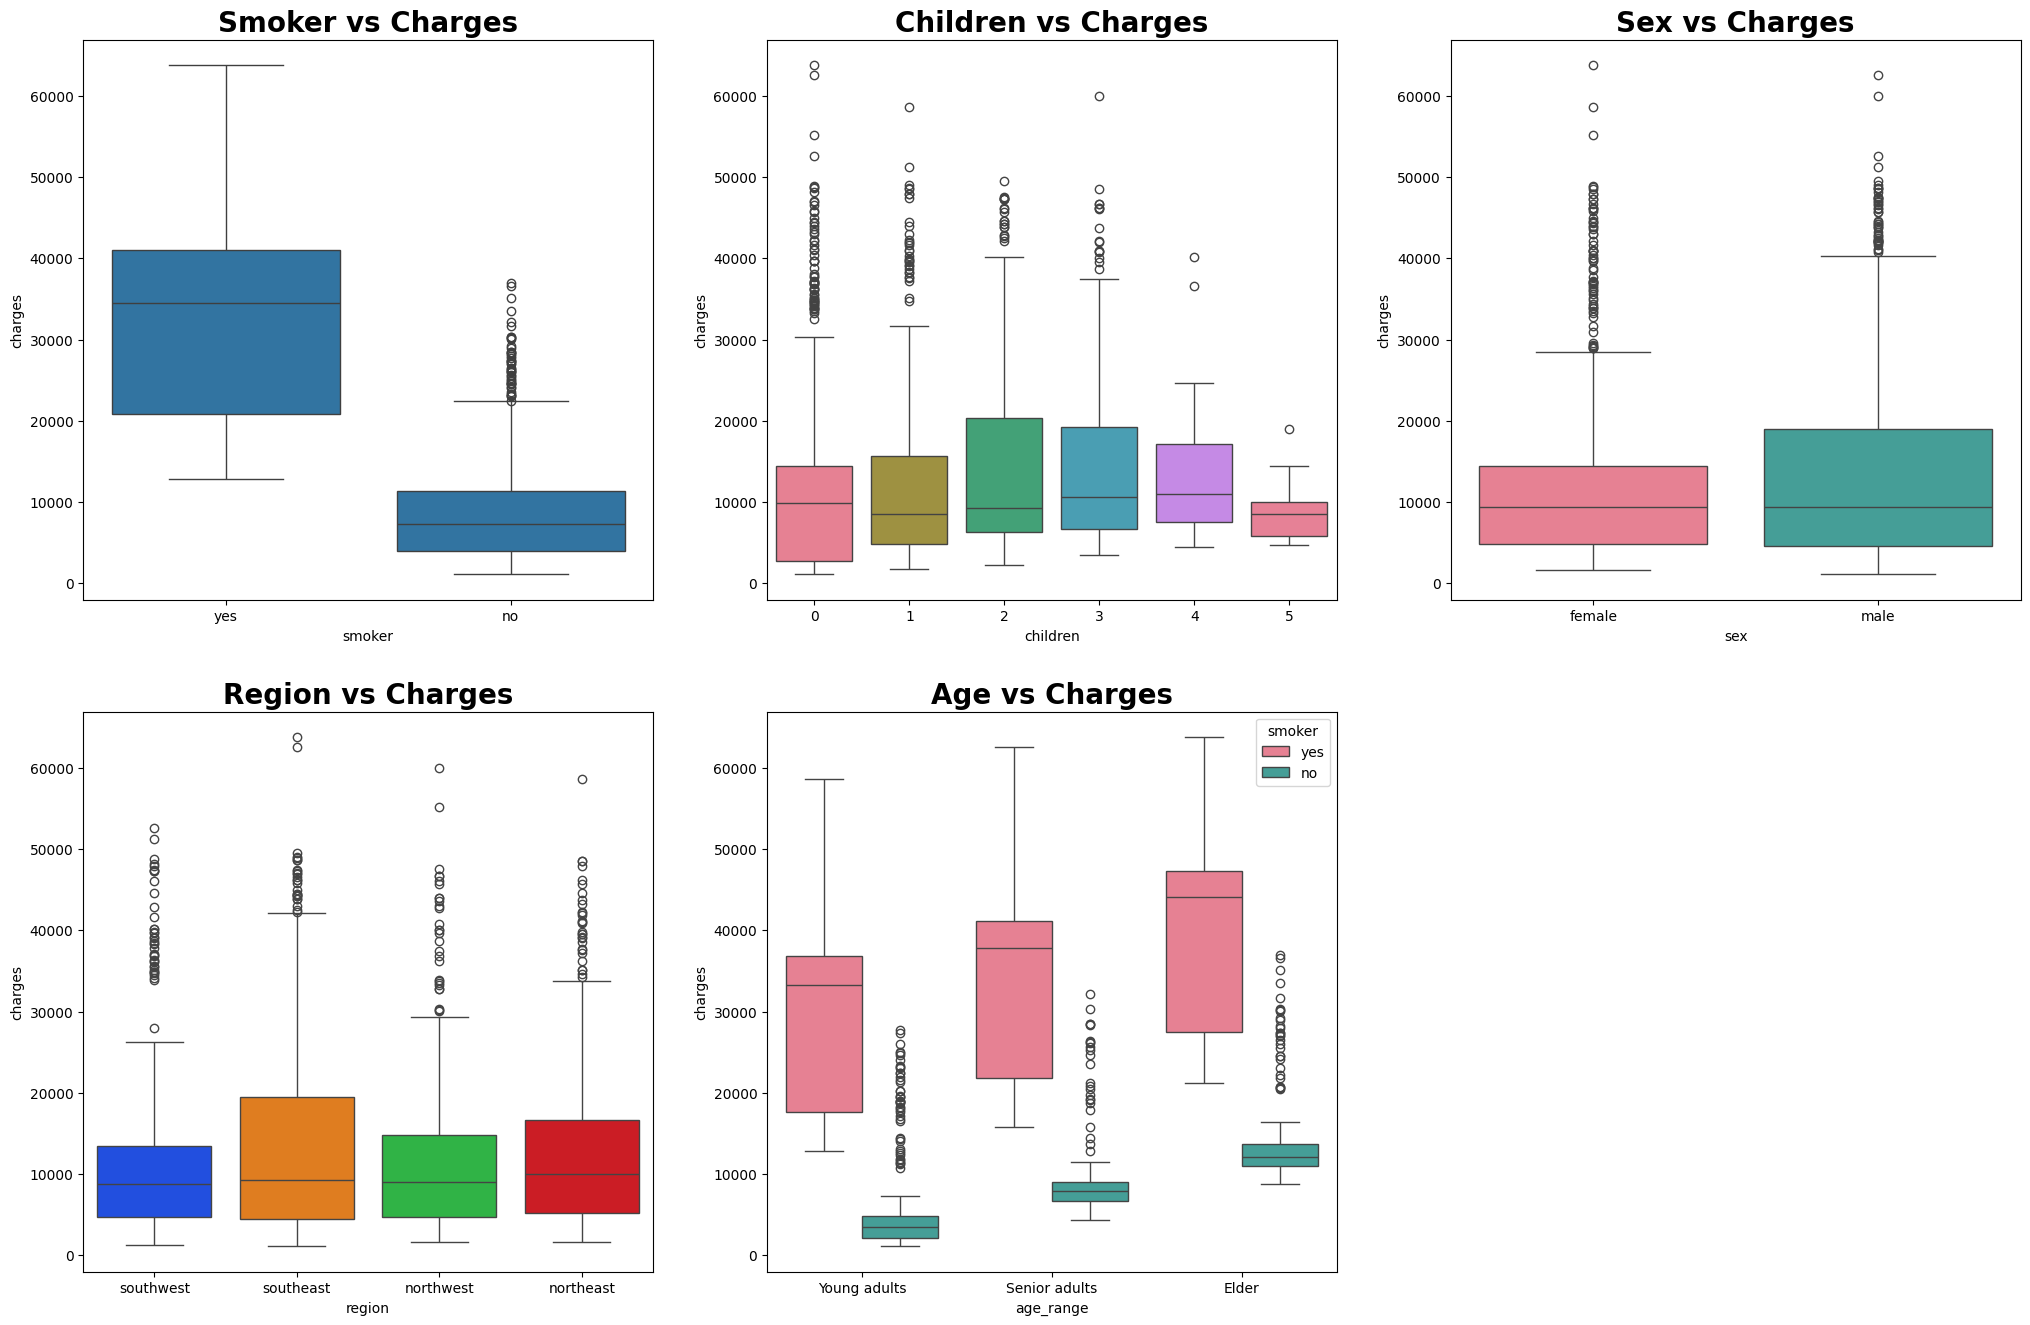

In [74]:
plt.figure(figsize=(25, 16))
plt.subplot(2,3,1)
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,2)
sns.boxplot(x = 'children', y = 'charges', data = df,hue='children',palette="husl",legend=False)
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,3)
sns.boxplot(x = 'sex', y = 'charges', data = df,hue='sex',palette= 'husl',legend=False)
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,4)
sns.boxplot(x = 'region', y = 'charges', data = df,hue='region',palette="bright",legend=False)
plt.title('Region vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,5)
sns.boxplot(x = 'age_range', y = 'charges', data = df,hue='smoker', palette= 'husl')
plt.title('Age vs Charges',fontweight="bold", size=20)
plt.show()


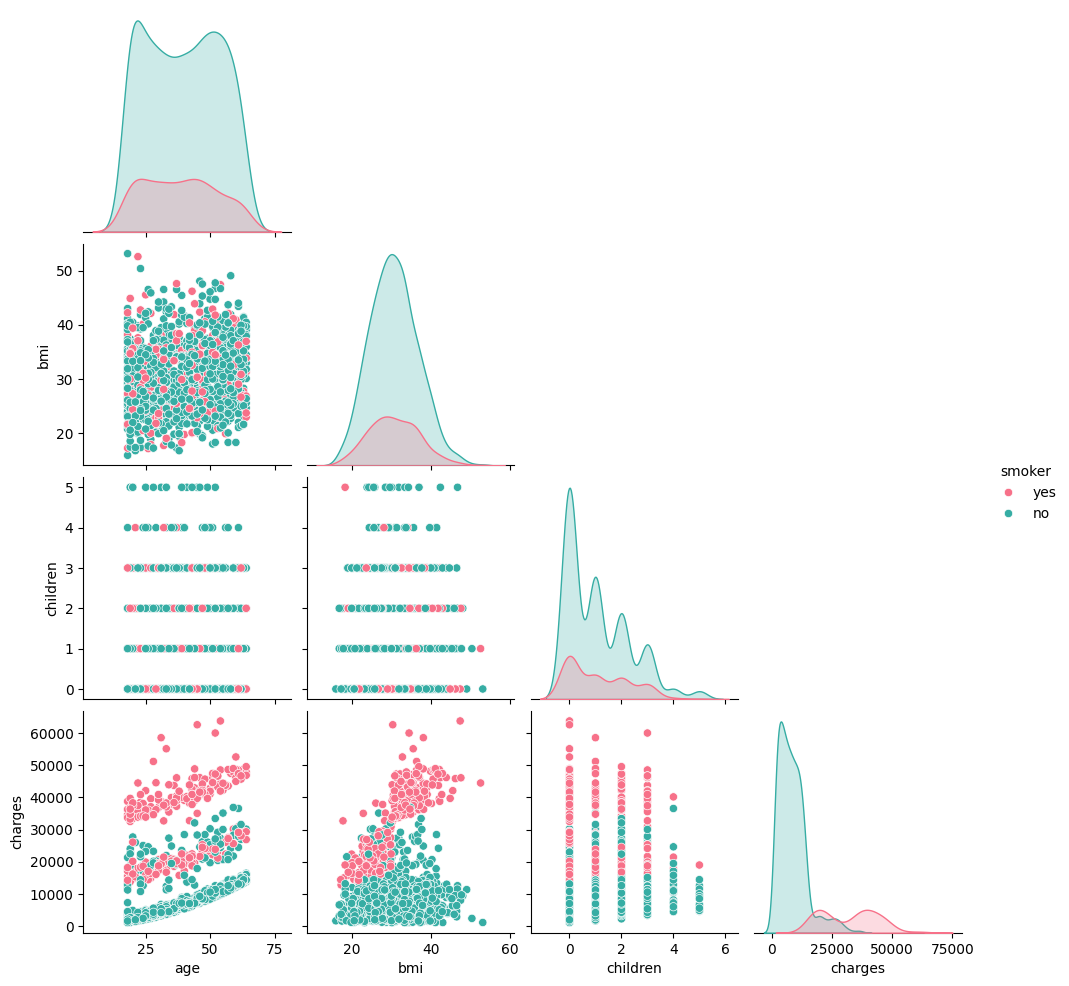

In [75]:
sns.pairplot(df, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl", corner = True)
plt.show()

In [76]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [77]:
for col in cat_cols:
    print(df[col].value_counts())
    print('*'*30)

sex
male      675
female    662
Name: count, dtype: int64
******************************
smoker
no     1063
yes     274
Name: count, dtype: int64
******************************
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
******************************


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le_encoder = LabelEncoder()
df['sex'] = le_encoder.fit_transform(df['sex'])
df['smoker'] = le_encoder.fit_transform(df['smoker'])

df = pd.get_dummies(df, columns = ['region','age_range'])

In [80]:
df = df.astype(int)

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_range_Young adults,age_range_Senior adults,age_range_Elder
0,19,0,27,0,1,16884,0,0,0,1,1,0,0
1,18,1,33,1,0,1725,0,0,1,0,1,0,0
2,28,1,33,3,0,4449,0,0,1,0,1,0,0
3,33,1,22,0,0,21984,0,1,0,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0,1,0,0


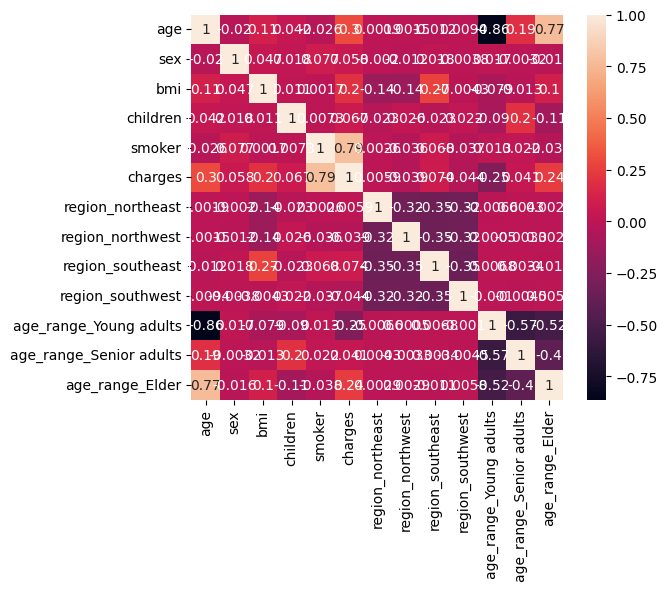

In [81]:
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

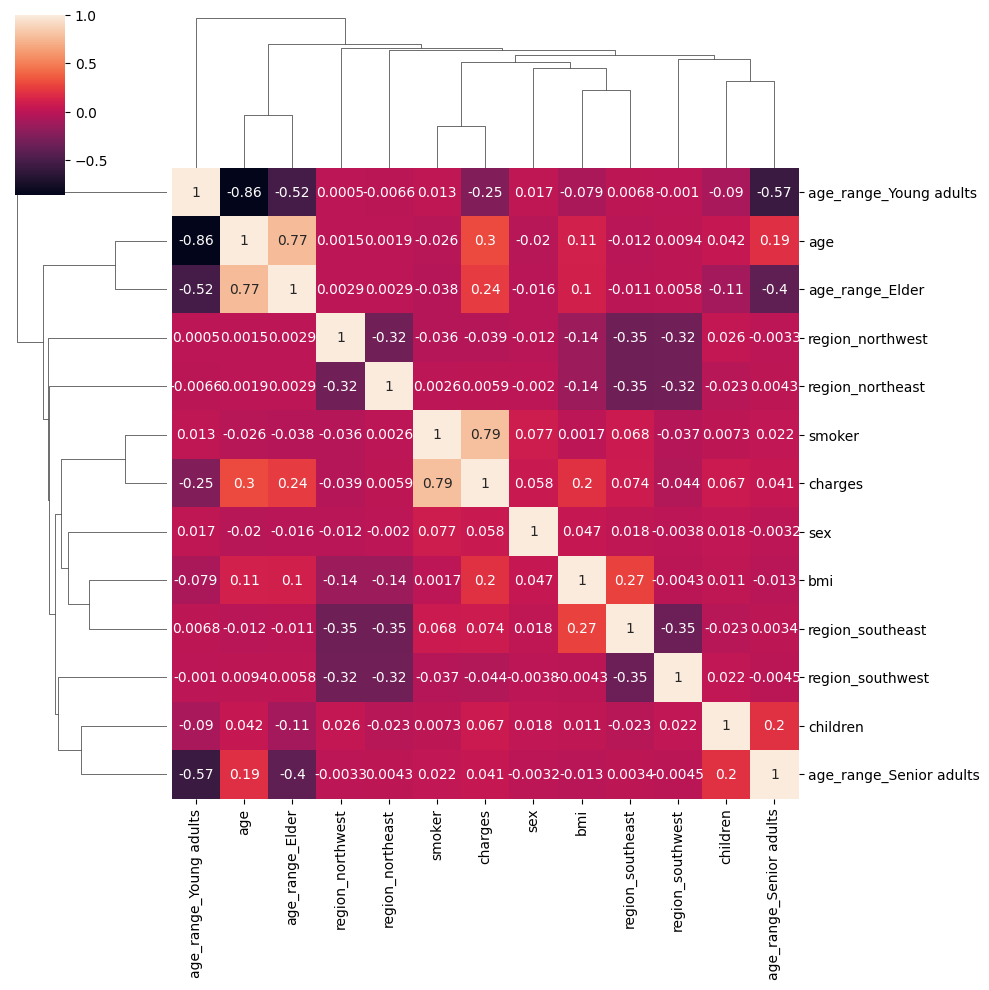

In [82]:
sns.clustermap(df.corr(numeric_only=True),annot=True)

In [83]:
encoder = LabelEncoder()
df['smoker'] = encoder.fit_transform(df['smoker'])


In [84]:
bins = [18, 30, 45, 60, 80]  
labels = ['18-30', '30-45', '45-60', '60+']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)


In [85]:
df['bmi_smoker_interaction'] = df['bmi'] * df['smoker']

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['bmi', 'charges']] = scaler.fit_transform(df[['bmi', 'charges']])

In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'bmi', 'smoker']])


**MODEL TRAINING AND EVALUATION USING LINEAR REGRESSION**

In [88]:
X = df.drop('charges',axis=1)
y=df['charges']

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [91]:
X_train.shape,X_test.shape

((668, 14), (669, 14))

In [92]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age_range_Young adults,age_range_Senior adults,age_range_Elder,age_range,bmi_smoker_interaction
1237,58,0,-0.354547,0,0,0,1,0,0,0,0,1,45-60,0
539,53,1,0.135659,0,0,0,0,1,0,0,0,1,45-60,0
177,54,1,-0.191145,1,0,0,0,0,1,0,0,1,45-60,0
1291,19,1,0.625865,0,1,0,0,0,1,1,0,0,18-30,34
756,39,0,-1.334960,3,0,1,0,0,0,0,1,0,30-45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,51,0,0.625865,2,1,1,0,0,0,0,0,1,45-60,34
1131,27,1,2.423288,2,0,0,0,0,1,1,0,0,18-30,0
1295,20,1,-1.334960,1,0,0,0,0,1,1,0,0,18-30,0
861,38,0,-0.354547,3,0,0,0,0,1,0,1,0,30-45,0


In [93]:
X_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age_range_Young adults,age_range_Senior adults,age_range_Elder,age_range,bmi_smoker_interaction
900,49,1,-1.334960,0,0,1,0,0,0,0,1,0,45-60,0
1064,29,0,-0.844753,4,0,0,0,0,1,1,0,0,18-30,0
1256,51,0,0.952670,3,0,0,1,0,0,0,0,1,45-60,0
298,31,1,0.625865,3,1,0,1,0,0,1,0,0,30-45,34
237,31,1,1.279474,2,0,0,0,1,0,1,0,0,30-45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,34,1,0.625865,0,0,0,0,1,0,1,0,0,30-45,0
460,49,0,0.952670,3,0,0,0,1,0,0,1,0,45-60,0
1234,45,0,-0.517949,2,0,0,0,1,0,0,1,0,30-45,0
144,30,1,-0.354547,3,1,0,1,0,0,1,0,0,18-30,28


In [94]:
t1 = ColumnTransformer(transformers=[('t1',FunctionTransformer(np.log1p),['age'])],remainder='passthrough')

In [95]:
t2 = ColumnTransformer(transformers=[
    ('t1',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

In [96]:
t3 = ColumnTransformer(transformers=[
    ('scaled',StandardScaler(),slice(0,8))
])

In [97]:
t4 = LinearRegression()

In [98]:
pipe = Pipeline([
    ('t1',t1),
    ('t2',t2),
    ('t3',t3),
    ('t4',t4)
])

In [99]:
pipe.fit(X_train,y_train)

c:\Users\admin\OneDrive\Desktop\Lipita.ipynb\myenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('t1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['age'])])),
                ('t2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 4, 5])])),
                ('t3',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('t4', LinearRegression())])

In [100]:
y_pred = pipe.predict(X_test)

In [101]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

In [102]:
print("Mean Absolute Error is: ",mae)
print("Mean Squared Error is: ",mse)
print("Root Mean Squared Error is: ",rmse)
print("R2 score is : ",r2)

Mean Absolute Error is:  0.35845338728705917
Mean Squared Error is:  0.26543160038924846
Root Mean Squared Error is:  0.5152005438557382
R2 score is :  0.7563749984460391


In [103]:
print(cross_val_score(pipe, X, y, cv=5, scoring='r2').mean())

0.7401522287928962


**ASSUMPTIONS**

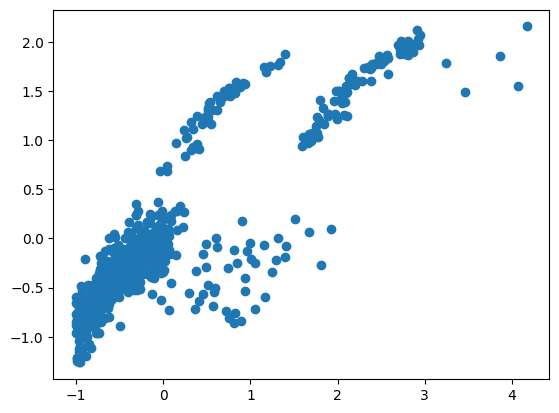

In [104]:
plt.scatter(y_test,y_pred)

In [105]:
residuals=y_test-y_pred
print(residuals)

900     0.011191
1064    0.042964
1256   -0.200202
298     0.612741
237    -0.421959
          ...   
557    -0.367776
460    -0.238691
1234   -0.057178
144    -0.685264
501    -0.159313
Name: charges, Length: 669, dtype: float64


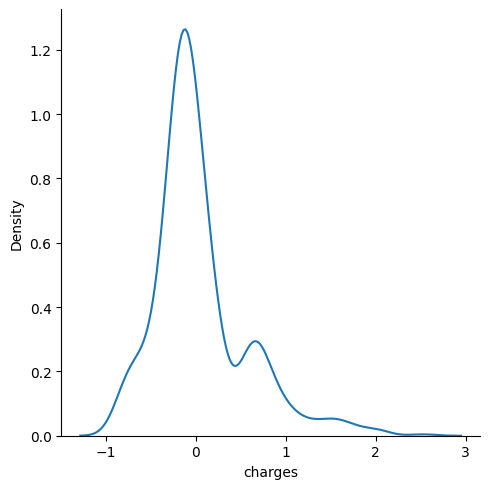

In [106]:
##Plot the residuals
sns.displot(residuals,kind='kde')

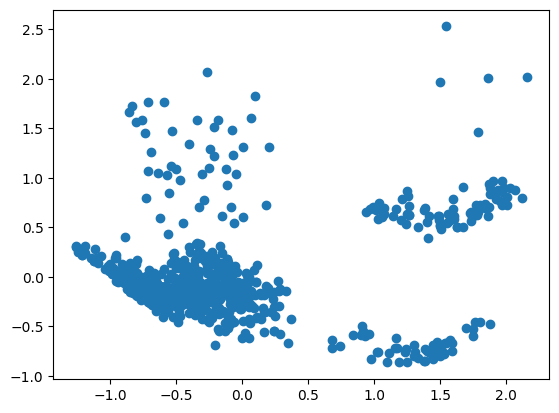

In [107]:
##Scatter plot wrt predictions and residuals
plt.scatter(y_pred,residuals)

In [108]:
print(t4.coef_)

[-0.0050348   0.75564891  0.04417973  0.27582824  0.16765959  0.03082988
  0.0168013   0.00806966]


**OLS linear regression**

In [109]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [110]:
import numpy as np

X_train = np.asarray(X_train).astype(float)
y_train = np.asarray(y_train).astype(float)


In [111]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)
print(model.summary())

900    -0.186202
1064   -0.395987
1256   -0.006439
298     1.811792
237    -0.704042
          ...   
557    -0.745158
460    -0.014955
1234   -0.292113
144     1.208902
501    -0.447033
Length: 669, dtype: object
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     249.5
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          5.23e-251
Time:                        11:36:51   Log-Likelihood:                -298.79
No. Observations:                 668   AIC:                             627.6
Df Residuals:                     653   BIC:                             695.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                      

**MODEL TRAINING AND EVALUATION USING RANDOM FOREST**

In [112]:
X = df.drop('charges', axis=1)
y = df['charges']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [114]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_split=2, random_state=42, bootstrap=True)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=42)

In [116]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.8644459598978573


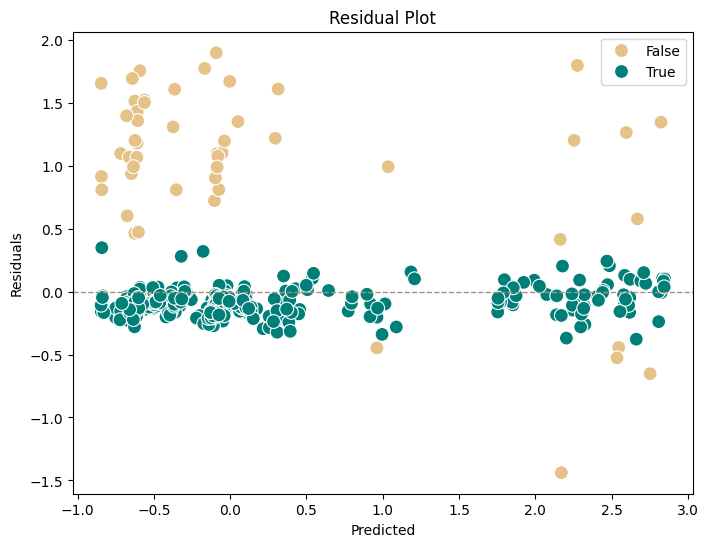

In [117]:
residuals = y_test - y_pred
sigma = np.std(residuals)
hue = list(map(lambda x: abs(x) < sigma, residuals))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, hue=hue, palette = ['#E5C287', '#007F79'], s=100)
plt.axhline(y=0, color='#A79277', linestyle='--', lw=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [118]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 0.39110341774933394


**HYPERPARAMETER TUNING**

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [None, 10, 20, 30],      
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}



In [122]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,scoring='r2', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [123]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8646736728633143
MAE: 0.21133133749214256
MSE: 0.15270492752174367


**CONCLUSION**

*This project successfully harnesses machine learning to decode the complexities of health insurance pricing, offering a predictive model that brings transparency and accuracy to premium estimation. The model’s ability to learn from real-world medical and lifestyle factors ensures a fair, data-driven approach to cost assessment.*

***Future Scope: Redefining Health Insurance with AI***

*1. AI-Powered Premium Recommender*

*2. Fair & Transparent Pricing Model*

*3. Live Deployment & User Interaction*

*4. Deep Learning for Healthcare Cost Prediction*

**This project is a step toward modernizing the health insurance industry, ensuring that pricing is not just a number—but a fair, explainable, and data-driven decision.**